## Titanic: Machine Learning from Disaster

### 1. 必要パッケージのインポート

pandas: https://techacademy.jp/magazine/17697 \
numpy : https://techacademy.jp/magazine/17454 \
matplotlib:https://techacademy.jp/magazine/17472

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.学習データおよび評価データの取り込み

In [3]:
# 学習データ
train_df = pd.read_csv("./data/train.csv")
# 評価データ
test_df = pd.read_csv("./data/test.csv")

PassengerId : 乗客識別ユニークID \
Survived    : 生存フラグ（0=死亡, 1=生存）\
Pclass      : チケットクラス \
Name        : 乗客の名前 \
Sex         : 性別 \
Age         : 年齢 \
SipSp       : titanicに同乗している兄弟/配偶者の数 \
Parch       : titanicに同乗している親/子供の数 \
Ticket      : チケット番号 \
Fare        : 料金 \
Cabin       : 客室番号 \
Embarked    : 出港地

In [4]:
# 学習データの確認
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 評価データの確認
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# データ格納数の確認
print('train_df : ', train_df.shape)
print('test_df  : ', test_df.shape)

train_df :  (891, 12)
test_df  :  (418, 11)


In [6]:
# 訓練データの基本統計量の確認
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. データの概観

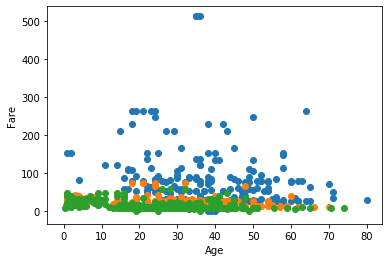

In [13]:
# チケットクラスによる年齢と運賃の関係
train_df1 = train_df[train_df["Pclass"] == 1]
train_df2 = train_df[train_df["Pclass"] == 2]
train_df3 = train_df[train_df["Pclass"] == 3]

plt.scatter(train_df1["Age"], train_df1["Fare"])
plt.scatter(train_df2["Age"], train_df2["Fare"])
plt.scatter(train_df3["Age"], train_df3["Fare"])

plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

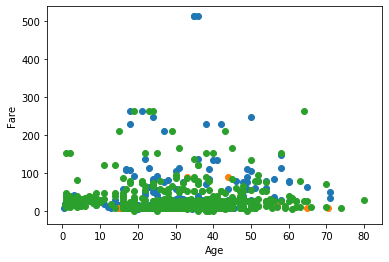

In [14]:
# チケットクラスによる年齢と運賃の関係
train_df1 = train_df[train_df["Embarked"] == "C"]
train_df2 = train_df[train_df["Embarked"] == "Q"]
train_df3 = train_df[train_df["Embarked"] == "S"]

plt.scatter(train_df1["Age"], train_df1["Fare"])
plt.scatter(train_df2["Age"], train_df2["Fare"])
plt.scatter(train_df3["Age"], train_df3["Fare"])

plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### 4. 事前のデータ処理

#### 4-1. 欠損値の処理

In [7]:
# 欠損値の確認
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# データセットの事前処理
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [10]:
# 事前処理後の欠損値の確認
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 4-2. 文字データを数値データに置き換える

In [11]:
# 文字列を数字に変換
train_df["Sex"][train_df["Sex"] == "male"] = 0
train_df["Sex"][train_df["Sex"] == "female"] = 1
train_df["Embarked"][train_df["Embarked"] == "S"] = 0
train_df["Embarked"][train_df["Embarked"] == "C"] = 1
train_df["Embarked"][train_df["Embarked"] == "Q"] = 2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [13]:
# テストデータにも同様の処理を実施
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df["Sex"][test_df["Sex"] == "male"] = 0
test_df["Sex"][test_df["Sex"] == "female"] = 1
test_df["Embarked"][test_df["Embarked"] == "S"] = 0
test_df["Embarked"][test_df["Embarked"] == "C"] = 1
test_df["Embarked"][test_df["Embarked"] == "Q"] = 2
test_df.Fare[152] = test_df.Fare.median()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [14]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


### 5.予測モデル その１「決定木」
参考：https://cacoo.com/ja/blog/what-is-decision-tree/

In [15]:
from sklearn import tree

In [16]:
# 「train_df」の目的変数と説明変数の値を取得
y = train_df["Survived"].values
x = train_df[["Pclass", "Sex", "Age", "Fare"]].values

# 決定木の作成
model = tree.DecisionTreeClassifier()
model.fit(x, y)

# [test_df]の説明変数を使ってモデルで予測
x_test = test_df[["Pclass", "Sex", "Age", "Fare"]].values

# [test_df]の説明変数を使ってモデルで予測
prediction = model.predict(x_test)

In [17]:
prediction

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
prediction.shape

(418,)

In [19]:
# PassengerIdを取得
PassengerId = np.array(test_df["PassengerId"]).astype(int)

# predictionとPassengerIdから提出データを作成する
submit_data = pd.DataFrame(prediction, PassengerId, columns=["Survived"])

submit_data.head()

,Survived
892,0
893,0
894,1
895,1
896,1


In [20]:
# submit_data.csvとしてファイル出力
submit_data.to_csv("submit.csv", index_label=["PassengerId"])